In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from core.data.utils import read_all_datasets, read_all_metadata
from core.data.processing.normalization import robust_zscore_normalization_per_dataset

In [2]:
DATA_DIR = '../../db'

dataset, dataset_label = read_all_datasets(DATA_DIR, dropna=False)
metadata = read_all_metadata(DATA_DIR)

In [3]:
y = metadata[metadata.disease.isin(['Ctrl', 'UC']) & metadata.time_of_biopsy.isin([None, 'W0', 'Before'])].disease
dataset_labels = dataset_label.loc[y.index]
X = dataset.loc[y.index]

X.shape, y.shape

((934, 30007), (934,))

In [4]:
X_norm = robust_zscore_normalization_per_dataset(X, dataset_label)

/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountere

In [5]:
from core.utils.genes import entrez_id_to_gene_symbol

X_norm = entrez_id_to_gene_symbol(X_norm)

4974 input query terms found no hit:	['100127886', '100127940', '100127972', '100127974', '100128046', '100128175', '100128185', '1001281


In [7]:
from core.stats.tests import test_two_groups


test_data = X_norm.astype(float)
test_data['disease'] = y

test_results = test_two_groups(test_data, 'disease', alpha=0.05/test_data.shape[1])

Test results for disease:
Group counts: 73 | 129
- BACE2: [Mann-Whitney U test] p-value = 0.0; mean difference = 0.9087
- S100P: [Mann-Whitney U test] p-value = 0.0; mean difference = 1.0827
- CCL11: [Mann-Whitney U test] p-value = 0.0; mean difference = 0.7703
- CYTOR: [Mann-Whitney U test] p-value = 0.0; mean difference = 0.7131
- GPX8: [Mann-Whitney U test] p-value = 0.0; mean difference = 0.8996
- DAPP1: [Mann-Whitney U test] p-value = 0.0; mean difference = 0.8065
- SERF1B: [Mann-Whitney U test] p-value = 0.0; mean difference = -1.2853
- SAMD9L: [Mann-Whitney U test] p-value = 0.0; mean difference = 0.7356
- PDZK1IP1: [Mann-Whitney U test] p-value = 0.0; mean difference = 0.8228
- IL1B: [Mann-Whitney U test] p-value = 0.0; mean difference = 0.8137
- SERF1A: [Mann-Whitney U test] p-value = 0.0; mean difference = -1.3417
- COL1A2: [Mann-Whitney U test] p-value = 0.0; mean difference = 0.7676
- SLC39A5: [Mann-Whitney U test] p-value = 0.0; mean difference = -0.7068
- C4BPB: [Mann-Whi

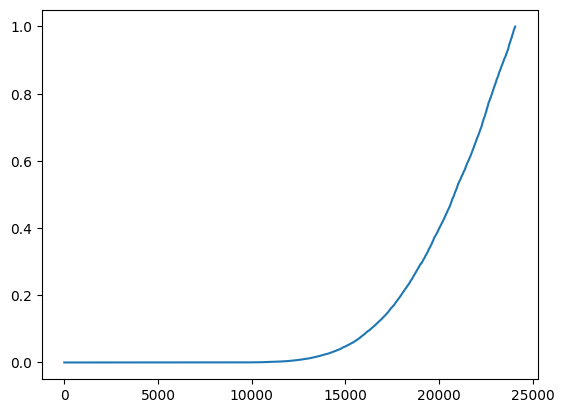

In [8]:
import matplotlib.pyplot as plt

plt.plot([p for f, (p, d, t) in test_results]);

In [ ]:
genes = [f for f, (p, d, t) in test_results if p < 0.05/test_data.shape[1]]

In [ ]:
import gseapy as gp

# Get the list of available libraries
# libraries = gp.get_library_name(organism='Human')
# print(libraries)

# Define your gene list
gene_list = genes[:500]  # use your gene list variable

# Define parameters for Enrichr
enrichr_libraries = ['WikiPathway_2023_Human']

# Perform Enrichment Analysis
enrichr_results = gp.enrichr(gene_list=gene_list, gene_sets=enrichr_libraries, organism='Human', outdir='../../results/enrichr_kegg', cutoff=0.05)

In [11]:
enrichr_results.res2d[enrichr_results.res2d['Adjusted P-value'] < 0.05].sort_values('Combined Score', ascending=False).head(20)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
19,WikiPathway_2023_Human,Arachidonic Acid AA ARA Oxylipin Metabolism WP...,3/4,6.097384e-05,1.533492e-03,0,0,117.700201,1142.288171,EPHX2;TBXAS1;PTGS2
0,WikiPathway_2023_Human,Mitochondrial Fatty Acid Oxidation Disorders W...,9/19,2.625820e-10,8.951472e-08,0,0,35.725051,788.110979,HADHA;CPT1A;SLC22A5;ECI1;ACSL4;SLC25A20;HADH;A...
2,WikiPathway_2023_Human,Mitochondrial Long Chain Fatty Acid Beta Oxida...,8/17,2.877527e-09,4.824654e-07,0,0,35.214092,692.532115,HADHA;CPT1A;ECI1;ACSL4;SLC25A20;HADH;ACADS;ACSF2
4,WikiPathway_2023_Human,Glucuronidation WP698,9/26,7.598461e-09,7.644052e-07,0,0,21.007188,392.736109,UGT1A10;UGT1A1;UGT1A5;UGT1A4;UGT2A3;UGT1A3;UGT...
7,WikiPathway_2023_Human,miRNA Targets In ECM And Membrane Receptors WP...,7/22,7.206560e-07,4.531124e-05,0,0,18.444219,260.858508,COL3A1;COL1A2;COL4A1;LAMA4;COL5A2;COL6A3;LAMC1
1,WikiPathway_2023_Human,Burn Wound Healing WP5055,15/74,3.559234e-10,8.951472e-08,0,0,10.190984,221.718158,CXCL8;MMP1;TNC;CXCL1;INHBA;COL1A1;LGALS1;COL1A...
16,WikiPathway_2023_Human,Codeine And Morphine Metabolism WP1604,5/16,3.327853e-05,9.846531e-04,0,0,17.896235,184.520885,UGT1A10;ABCB1;UGT1A1;UGT1A9;UGT1A6
23,WikiPathway_2023_Human,Irinotecan Pathway WP229,4/12,1.628607e-04,3.304168e-03,0,0,19.649194,171.392352,UGT1A10;UGT1A1;UGT1A9;CES2
18,WikiPathway_2023_Human,Platelet Mediated Interactions With Vascular A...,5/17,4.617826e-05,1.222509e-03,0,0,16.404040,163.761560,SELP;CD40;IL1B;SELE;PF4
9,WikiPathway_2023_Human,Photodynamic Therapy Induced NF kB Survival Si...,8/35,1.874348e-06,9.427971e-05,0,0,11.727191,154.649390,IL1A;CXCL8;MMP1;IL1B;MMP3;PTGS2;CXCL2;SELE


# Experiments with normalization

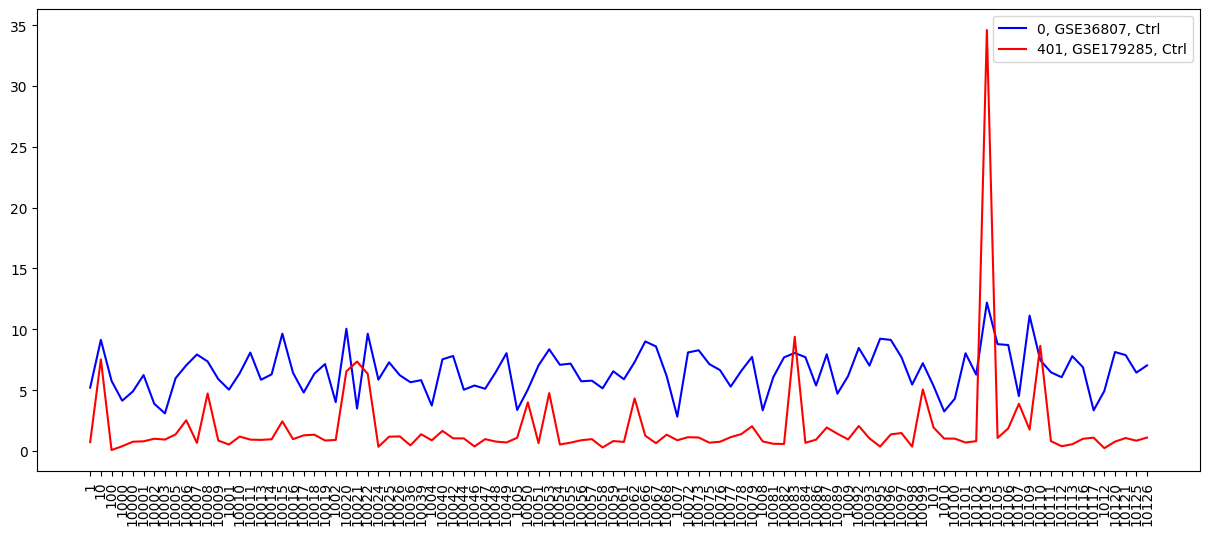

In [135]:
idx_0 = 0
idx_1 = 401
start_feature = 000
end_feature = 100
sample_0 = X.dropna(axis=1).iloc[idx_0, start_feature:end_feature]
sample_1 = X.dropna(axis=1).iloc[idx_1, start_feature:end_feature]

plt.figure(figsize=(15, 6));
plt.plot(sample_0, 'b');
plt.plot(sample_1, 'r');
plt.xticks(rotation=90);
plt.legend([f'{idx_0}, {dataset_labels.iloc[idx_0]}, {y.iloc[idx_0]}', f'{idx_1}, {dataset_labels.iloc[idx_1]}, {y.iloc[idx_1]}']);

/var/folders/04/rkl_cbwn2xd74cgn2p277ws00000gn/T/ipykernel_26316/4239693137.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y[idx_0])
/var/folders/04/rkl_cbwn2xd74cgn2p277ws00000gn/T/ipykernel_26316/4239693137.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y[idx_1])


UC
Ctrl


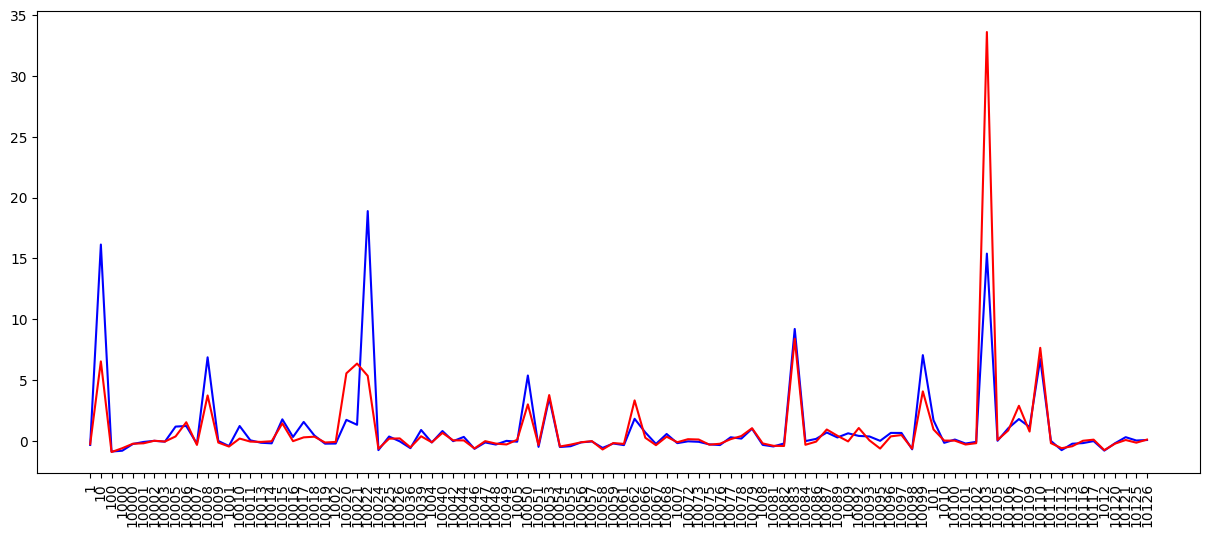

In [133]:
median_0, median_1 = sample_0.median(), sample_1.median()

plt.figure(figsize=(15, 6));
plt.plot(sample_0 - median_0, 'b');
print(y[idx_0])
plt.plot(sample_1 - median_1, 'r');
print(y[idx_1])
plt.xticks(rotation=90);

/var/folders/04/rkl_cbwn2xd74cgn2p277ws00000gn/T/ipykernel_26316/224693890.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y[idx_0])
/var/folders/04/rkl_cbwn2xd74cgn2p277ws00000gn/T/ipykernel_26316/224693890.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y[idx_1])


UC
Ctrl


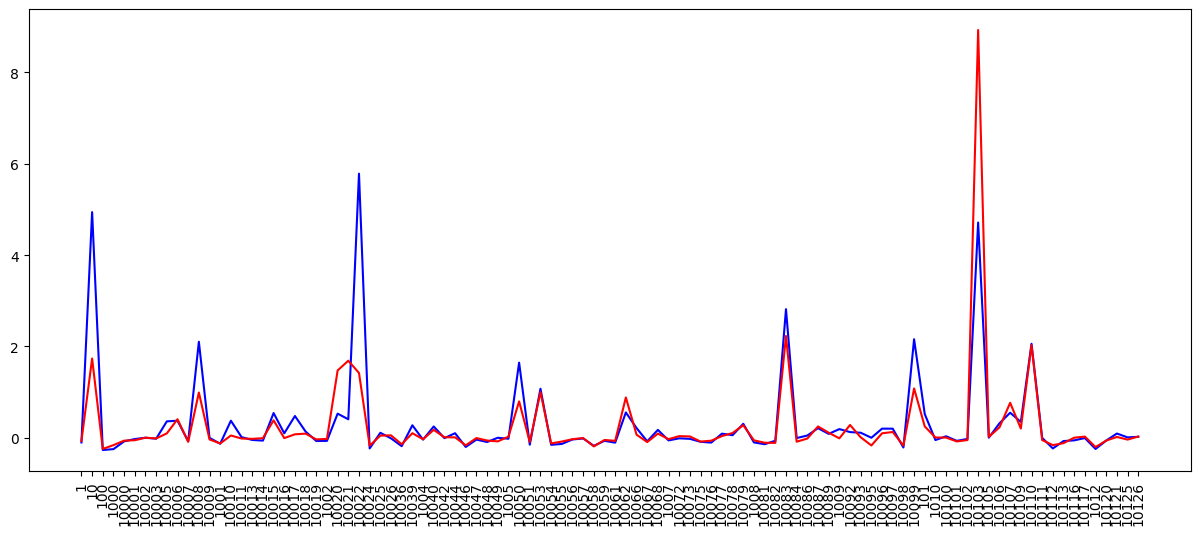

In [134]:
median_0, median_1 = sample_0.median(), sample_1.median()

sample_0_norm = (sample_0 - median_0)/(sample_0.std())
sample_1_norm = (sample_1 - median_1)/(sample_1.std())

plt.figure(figsize=(15, 6));
plt.plot(sample_0_norm, 'b');
print(y[idx_0])
plt.plot(sample_1_norm, 'r');
print(y[idx_1])
plt.xticks(rotation=90);